In [3]:
import tensorflow as tf

In [4]:
import matplotlib.pyplot as plt


In [5]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

8


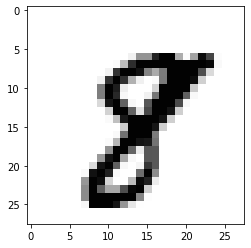

In [6]:
%matplotlib inline
image_index = 55
print(y_train[image_index])
plt.imshow(x_train[image_index],cmap='Greys')

In [7]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [8]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3470 - accuracy: 0.8926
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0849 - accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0543 - accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0420 - accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0320 - accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0236 - accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0218 - accuracy: 0.9927
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0191 - accuracy: 0.9935
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0181 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [10]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0636 - accuracy: 0.9840


[0.06362739950418472, 0.984000027179718]

5


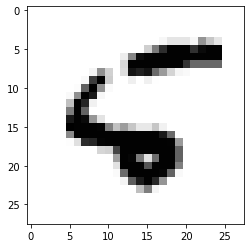

In [11]:
image_index = 8
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [12]:
model.save('digitCNN.h5')
